# Pykat plotting styles
Pykat now comes with a few plotting styles, some brief demonstrations of which are shown below.

In [1]:
import pykat
from pykat import finesse

In [2]:
kat = finesse.kat()
kat.verbose = False
kat.parse("""
l l1 1 0 0 n1 
s s1 10 1 n1 n2
m m1 0.9 0.1 0 n2 n3
s s2 10 1 n3 n4
m m2 0.91 0.09 0 n4 n5

ad refl 0 n2
ad circ 0 n4
ad tran 0 n5
pd pdcav n3

noplot refl

xaxis m2 phi lin 0 360 720
yaxis abs:deg
""")

out = kat.run()

## Included styles
The default plotting style remains the same:

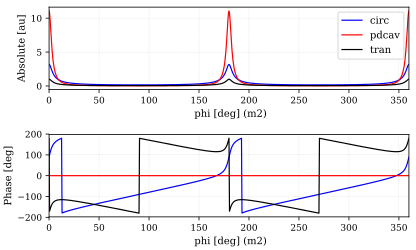

In [3]:
pykat.init_pykat_plotting()
out.plot()

There are now also `paper` and `greyscale` styles. These can be used with a call to `style.use`

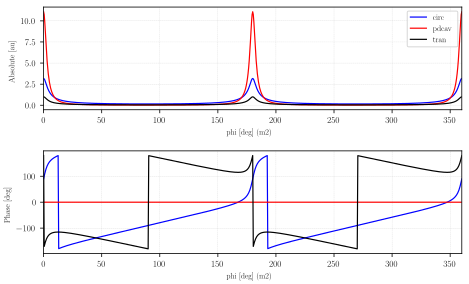

In [4]:
pykat.style.use("paper")
out.plot()

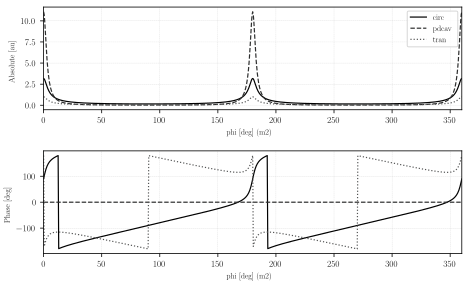

In [5]:
pykat.style.use("greyscale")
out.plot()

Styles can also be composed together, and are included from left to right:

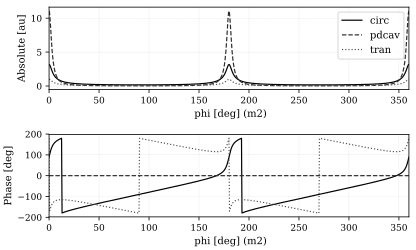

In [9]:
pykat.style.use(["default", "greyscale"])
out.plot()

We can also use a style temporarily via contexts:

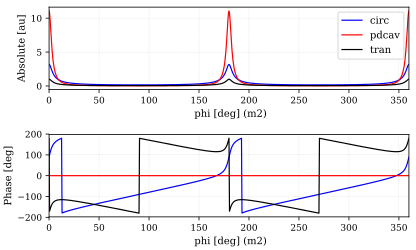

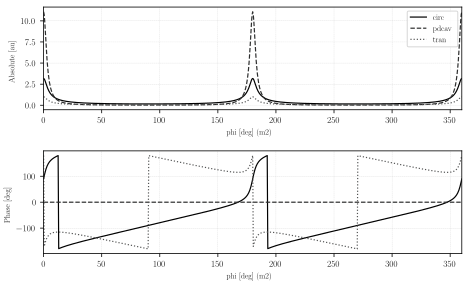

In [7]:
with pykat.style.context("default"):
    out.plot()
out.plot()

These styles also apply to plotting outside of pykat:

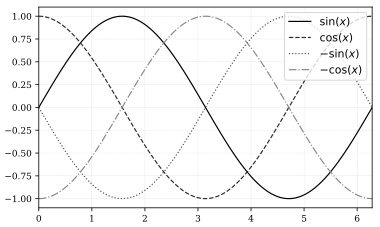

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)

with pykat.style.context(["default", "greyscale"]):
    plt.plot(x, np.sin(x), label=r"$\sin(x)$")
    plt.plot(x, np.cos(x), label=r"$\cos(x)$")
    plt.plot(x, -np.sin(x),label=r"$-\sin(x)$")
    plt.plot(x, -np.cos(x),label=r"$-\cos(x)$")
    plt.legend(loc='upper right')
    plt.show()

## Creating and editing styles

Stylesheets have the extension `.mplstyle` and are located in `pykat/style/`. These take the form of [matplotlibrc](https://matplotlib.org/users/customizing.html) files, and can contain any of the same parameters allowed (see the example matplotlibrc file at https://matplotlib.org/users/customizing.html for a full list). You can make changes to existing stylesheets or add new ones without having to change anything else in Pykat; they will automatically become available for use.